In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
players = pd.read_csv("C:/My/pyprojects/nba-players-stats-since-1950/Players.csv")
players.drop(["Unnamed: 0"],axis = 1,inplace=True)
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
stats = pd.read_csv("C:/My/pyprojects/nba-players-stats-since-1950/Seasons_Stats.csv")
stats.drop(["Unnamed: 0"],axis = 1,inplace=True)
stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
playerswithsize = players.set_index('Player').join(stats.set_index('Player'),lsuffix='_pl', rsuffix='_st')
playerswithsize.reset_index(inplace=True)
playerswithsize.drop(["collage","birth_city","birth_state"],axis = 1,inplace=True)

positionstd = {
    'C': 'C', 
    'C-F': 'C', 
    'C-PF': 'C', 
    'C-SF': 'C', 
    'F':'F', 
    'F-C':'F',
    'F-G':'F', 
    'G':'G', 
    'G-F':'G', 
    'PF':'F',
    'PF-C':'F', 
    'PF-SF':'F', 
    'PG':'G',
    'PG-SF':'G',
    'PG-SG':'G', 
    'SF':'F', 
    'SF-PF':'F', 
    'SF-PG':'F',
    'SF-SG':'F',
    'SG':'G', 
    'SG-PF':'G', 
    'SG-PG':'G', 
    'SG-SF':'G'
}
playerswithsize["PositionStd"] = playerswithsize["Pos"].map(positionstd)
playerswithsize.head()

Index(['Player', 'height', 'weight', 'born', 'Year', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48',
       'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Player,height,weight,born,Year,Pos,Age,Tm,G,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PositionStd
0,A.C. Green,203.0,106.0,1960.0,1986.0,PF,22.0,LAL,82.0,1.0,...,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0,F
1,A.C. Green,203.0,106.0,1960.0,1987.0,PF,23.0,LAL,79.0,72.0,...,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0,F
2,A.C. Green,203.0,106.0,1960.0,1988.0,PF,24.0,LAL,82.0,64.0,...,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0,F
3,A.C. Green,203.0,106.0,1960.0,1989.0,PF,25.0,LAL,82.0,82.0,...,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0,F
4,A.C. Green,203.0,106.0,1960.0,1990.0,PF,26.0,LAL,82.0,82.0,...,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0,F


In [165]:
years = playerswithsize["Year"].unique()
top150 = pd.DataFrame()
for year in years:
    stats = playerswithsize[playerswithsize["Year"] == year]
    top150 = pd.concat([top150,stats.nlargest(150,"MP")])

AllData = top150

In [170]:
def auto_scatter(df):
    positions = df["PositionStd"].unique()
    for pos in positions:
        stat = df[df["PositionStd"] == pos]
        fig = plt.figure(1)
        
        plt.suptitle('Statistics for ' + pos, fontsize=16)
        
        gs = gridspec.GridSpec(3, 2)
        ax1 = plt.subplot(gs[0, :])
        ax2 = plt.subplot(gs[1, 0])
        ax3 = plt.subplot(gs[1, 1])
        ax4 = plt.subplot(gs[2, 0])
        ax5 = plt.subplot(gs[2, 1])
        
        ax1.scatter(x = stat["Age"], y = stat["PTS/G"]) 
        ax1.set_title("PTS/Game")
        ax2.scatter(x = stat["Age"], y = stat["TRB/G"]) 
        ax2.set_title("TRB/Game")
        ax3.scatter(x = stat["Age"], y = stat["AST/G"])
        ax3.set_title("AST/Game")
        ax4.scatter(x = stat["Age"], y = stat["STL/G"]) 
        ax4.set_title("STL/Game")
        ax5.scatter(x = stat["Age"], y = stat["BLK/G"]) 
        ax5.set_title("BLK/Game")
        
        fig.set_size_inches(w=15,h=10)
        plt.show()

In [203]:
def auto_hist(df):
    positions = df["PositionStd"].unique()
    for pos in positions:
        stat = df[df["PositionStd"] == pos]
        stat.hist("Age")
        plt.title(pos)
        plt.show()

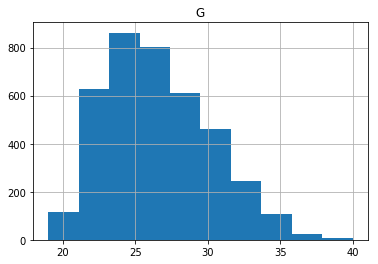

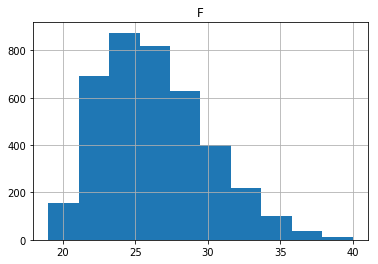

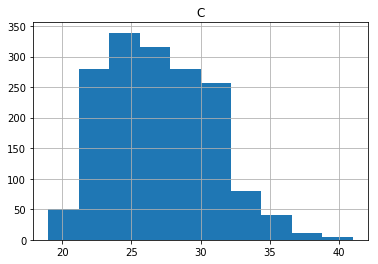

In [204]:
auto_hist(AllData)

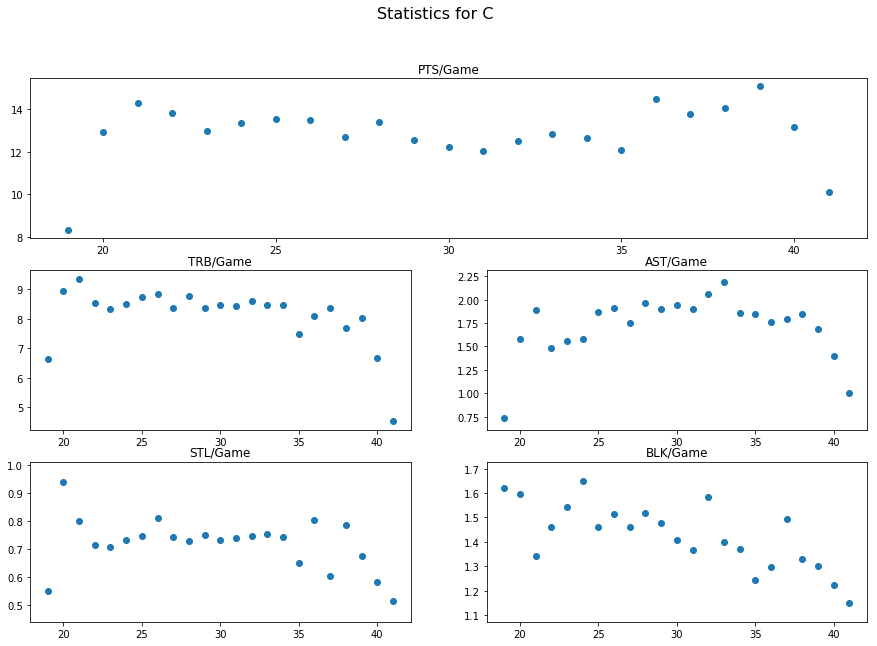

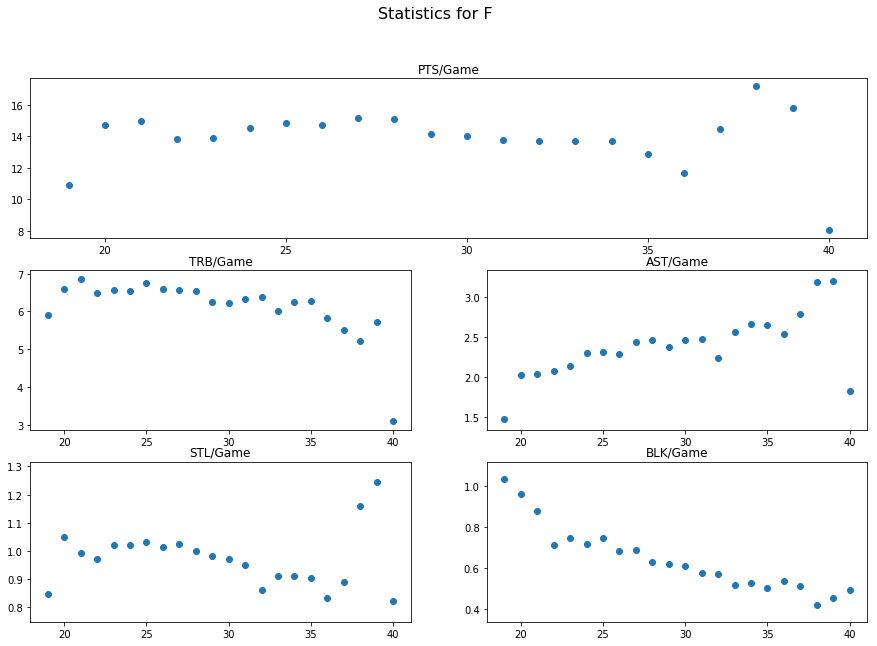

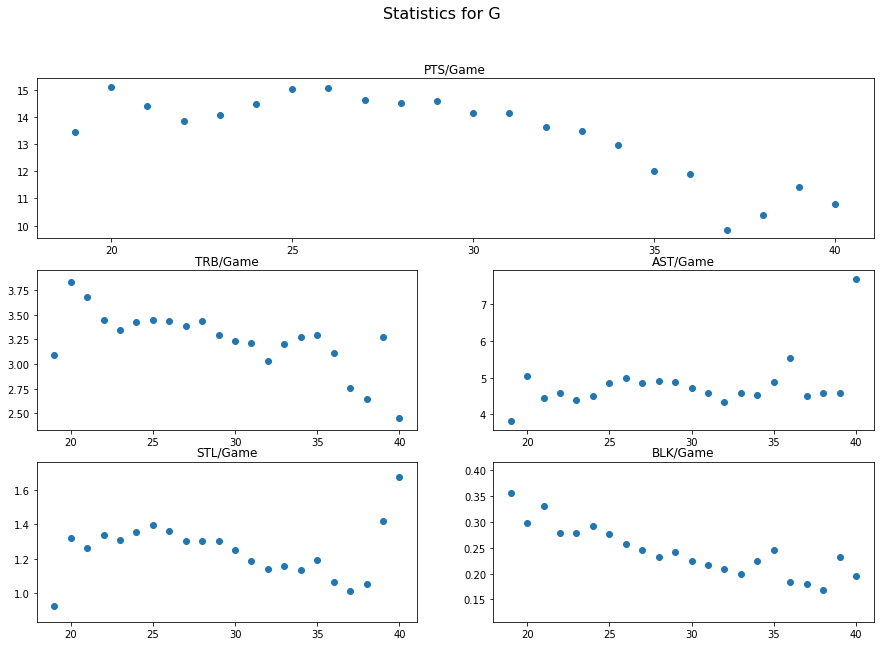

In [196]:
subset = AllData[["Pos","height","weight","Age","MP","PTS","TRB","AST","STL","BLK","PositionStd","G"]].dropna()
subset = subset[subset["MP"] > 0]
subset["PTS/G"] = subset["PTS"]/subset["G"]
subset["TRB/G"] = subset["TRB"]/subset["G"]
subset["AST/G"] = subset["AST"]/subset["G"]
subset["STL/G"] = subset["STL"]/subset["G"]
subset["BLK/G"] = subset["BLK"]/subset["G"]
subset.replace([np.inf, -np.inf], np.nan)
subset.dropna(inplace=True)

group = subset.groupby(["PositionStd","Age"]).mean()
groupCount = subset.groupby(["PositionStd","Age"]).count()
groupCount.reset_index(inplace=True)
groupCount.drop([],inplace=True)


grouped = group.reset_index()
grouped.drop([],inplace=True)


auto_scatter(grouped)